In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('bb_agente_de_tecnologia_modified.xlsx', index_col=0)  

In [3]:
dataset = dataset.drop('inscrição', 1)
dataset = dataset.drop('situação', 1)
dataset = dataset.reset_index(drop=True)

In [4]:
dataset.describe()

,l por,l ing,mat,atu,conh bas,prob,c ban,tec,conh esp,pontos,class ac,class pcd,class ppp,redação
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,8.00000,73.000000,583.000000
mean,12.514580,4.276158,5.925386,4.403087,27.119211,4.713551,6.087479,27.656089,38.457118,65.576329,292.000000,4.50000,37.000000,77.289880
std,2.124407,0.877887,1.522457,0.788964,3.361896,1.467672,1.283345,3.923297,4.303544,6.278249,168.441879,2.44949,21.217131,8.901717
min,6.000000,1.000000,1.500000,1.000000,16.500000,1.500000,1.500000,21.000000,34.500000,52.500000,1.000000,1.00000,1.000000,0.000000
25%,10.500000,4.000000,4.500000,4.000000,25.000000,3.750000,6.000000,25.500000,34.500000,61.500000,146.500000,2.75000,19.000000,70.000000
50%,13.500000,4.000000,6.000000,5.000000,27.500000,4.500000,6.000000,27.000000,37.500000,64.500000,292.000000,4.50000,37.000000,80.000000
75%,15.000000,5.000000,7.500000,5.000000,30.000000,6.000000,7.500000,30.000000,40.500000,69.000000,437.500000,6.25000,55.000000,80.000000
max,15.000000,5.000000,7.500000,5.000000,32.500000,7.500000,7.500000,42.000000,55.500000,88.000000,583.000000,8.00000,73.000000,100.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   nascimento  583 non-null    datetime64[ns]
 1   l por       583 non-null    float64       
 2   l ing       583 non-null    int64         
 3   mat         583 non-null    float64       
 4   atu         583 non-null    int64         
 5   conh bas    583 non-null    float64       
 6   prob        583 non-null    float64       
 7   c ban       583 non-null    float64       
 8   tec         583 non-null    float64       
 9   conh esp    583 non-null    float64       
 10  pontos      583 non-null    float64       
 11  class ac    583 non-null    int64         
 12  class pcd   8 non-null      float64       
 13  class ppp   73 non-null     float64       
 14  redação     583 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 68.4 KB


In [6]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [7]:
s = dataset["nascimento"]
age_list = pd.Series([])

for i in range(len(dataset.index)):
    age_list[i]=calculate_age(s[i])

dataset['Age'] = age_list.values

In [8]:
dataset.head()

,nascimento,l por,l ing,mat,atu,conh bas,prob,c ban,tec,conh esp,pontos,class ac,class pcd,class ppp,redação,Age
0,1997-09-30,9.0,5,6.0,4,24.0,3.0,7.5,27.0,37.5,61.5,425,NaN,51.0,80,25
1,1999-03-06,10.5,3,4.5,5,23.0,7.5,6.0,21.0,34.5,57.5,542,NaN,67.0,70,24
2,1985-05-09,10.5,5,7.5,5,28.0,6.0,6.0,24.0,36.0,64.0,324,NaN,NaN,70,38
3,1981-02-06,12.0,3,7.5,4,26.5,4.5,4.5,33.0,42.0,68.5,155,NaN,NaN,90,42
4,1989-10-30,13.5,3,7.5,4,28.0,4.5,6.0,28.5,39.0,67.0,209,NaN,NaN,80,33


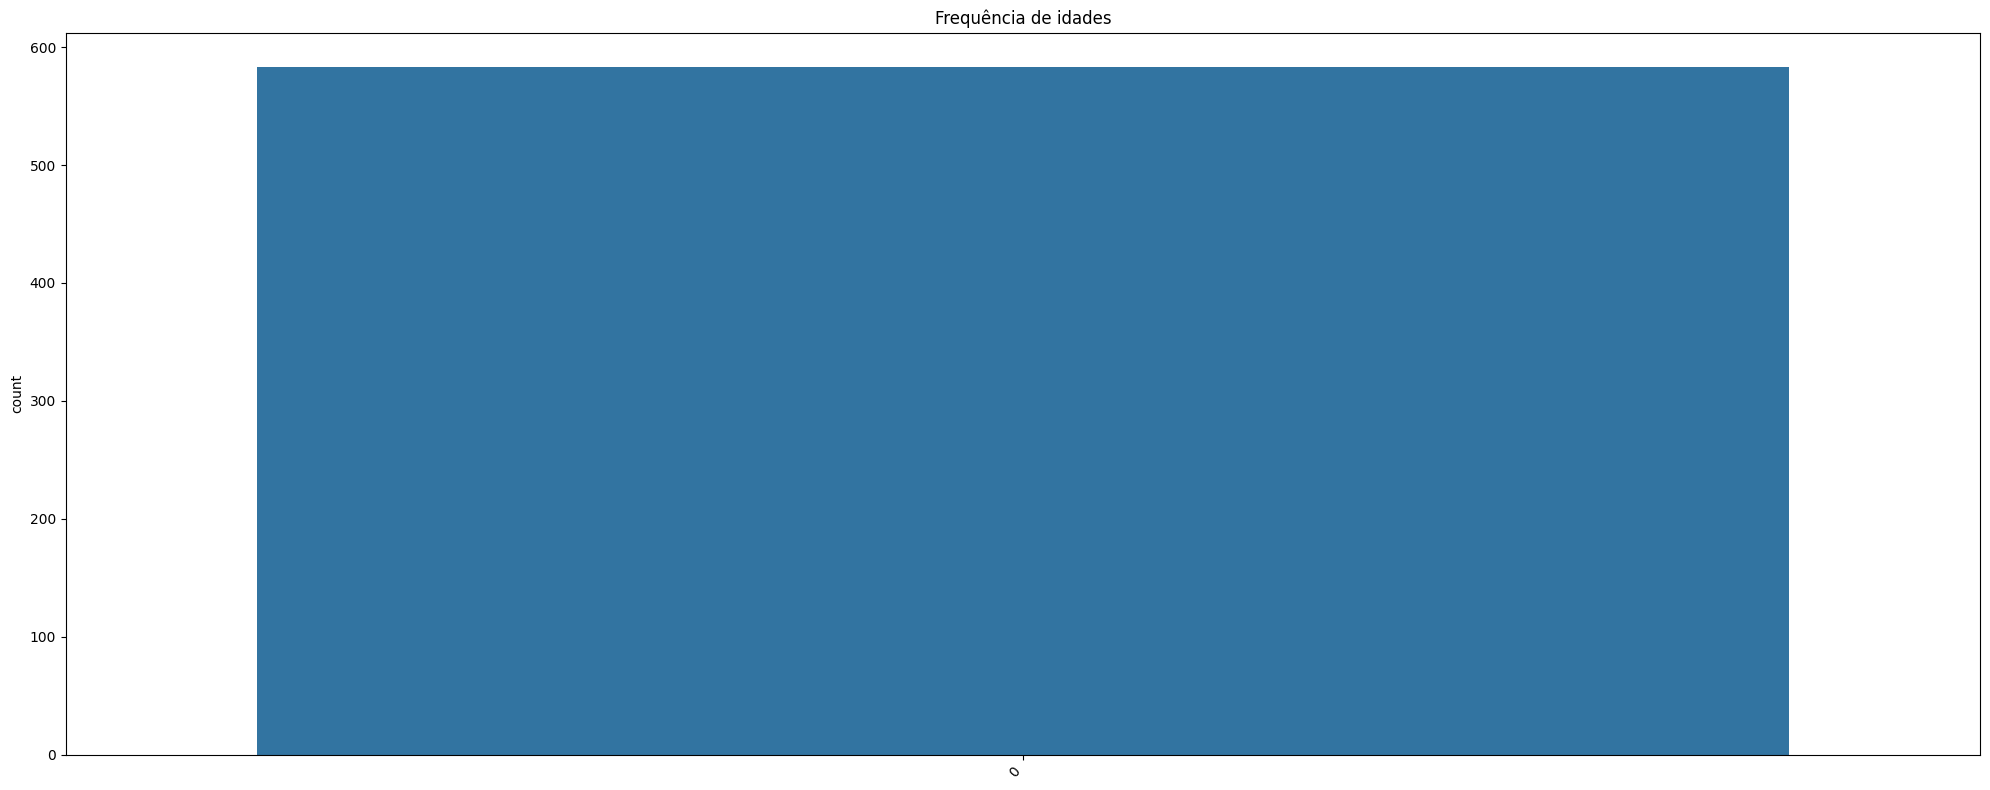

In [9]:

##Plotting idades

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Age'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de idades')
plt.tight_layout()

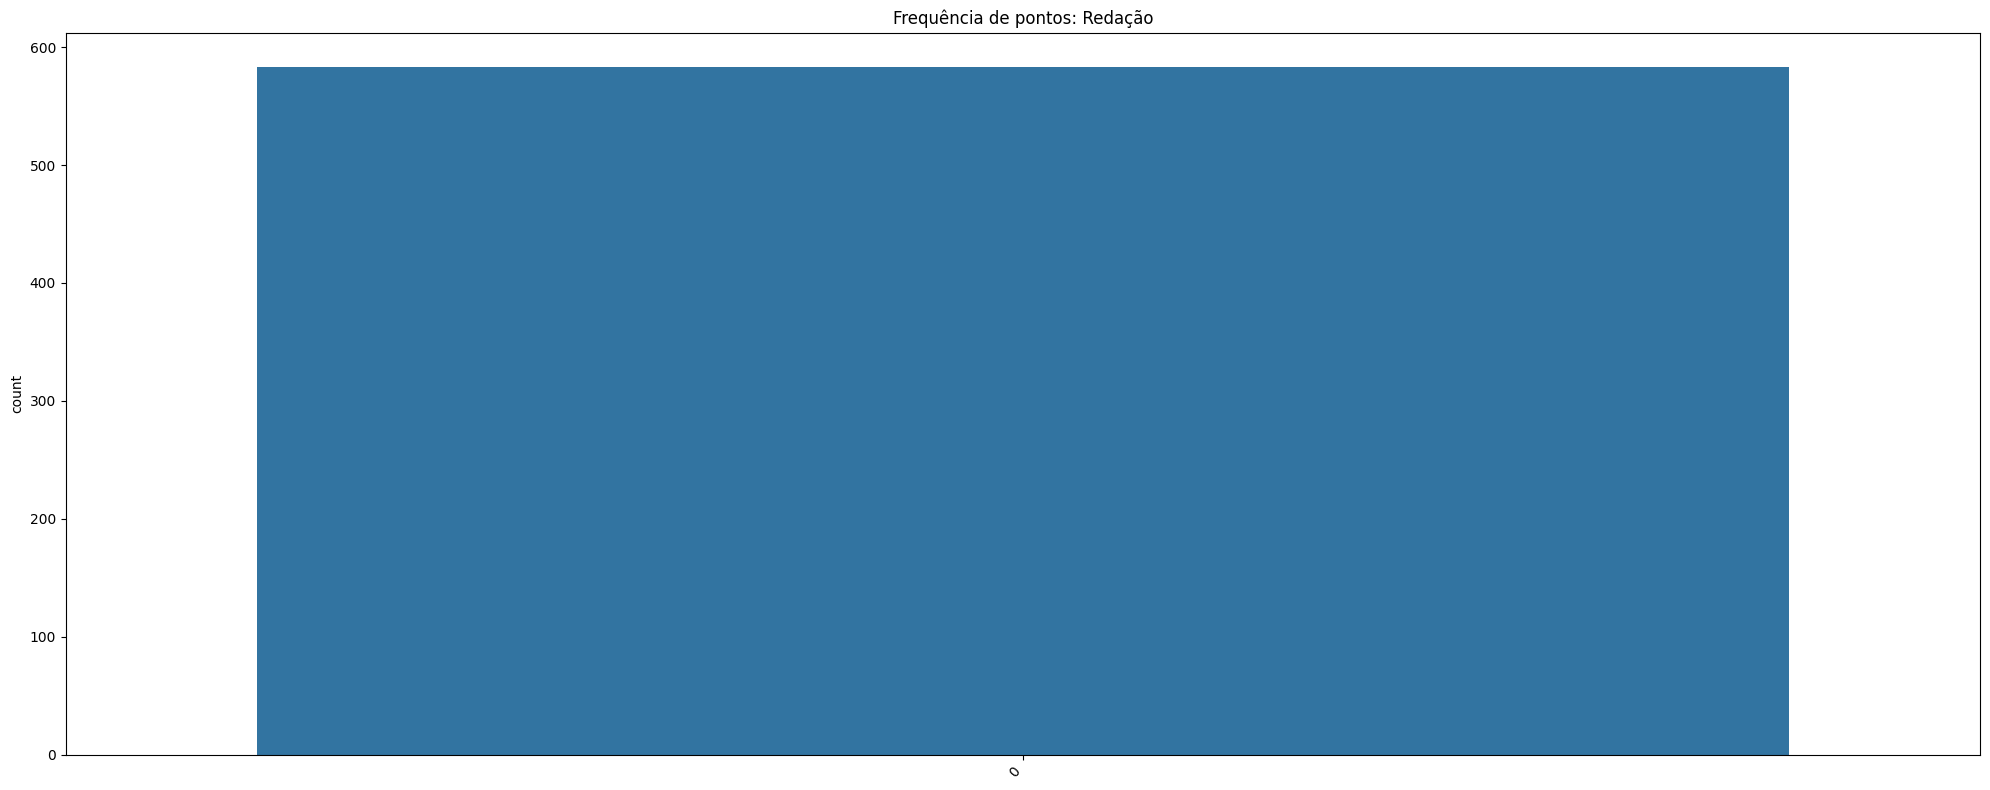

In [10]:
##Plotting pontos: Redação

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['redação'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Redação')
plt.tight_layout()

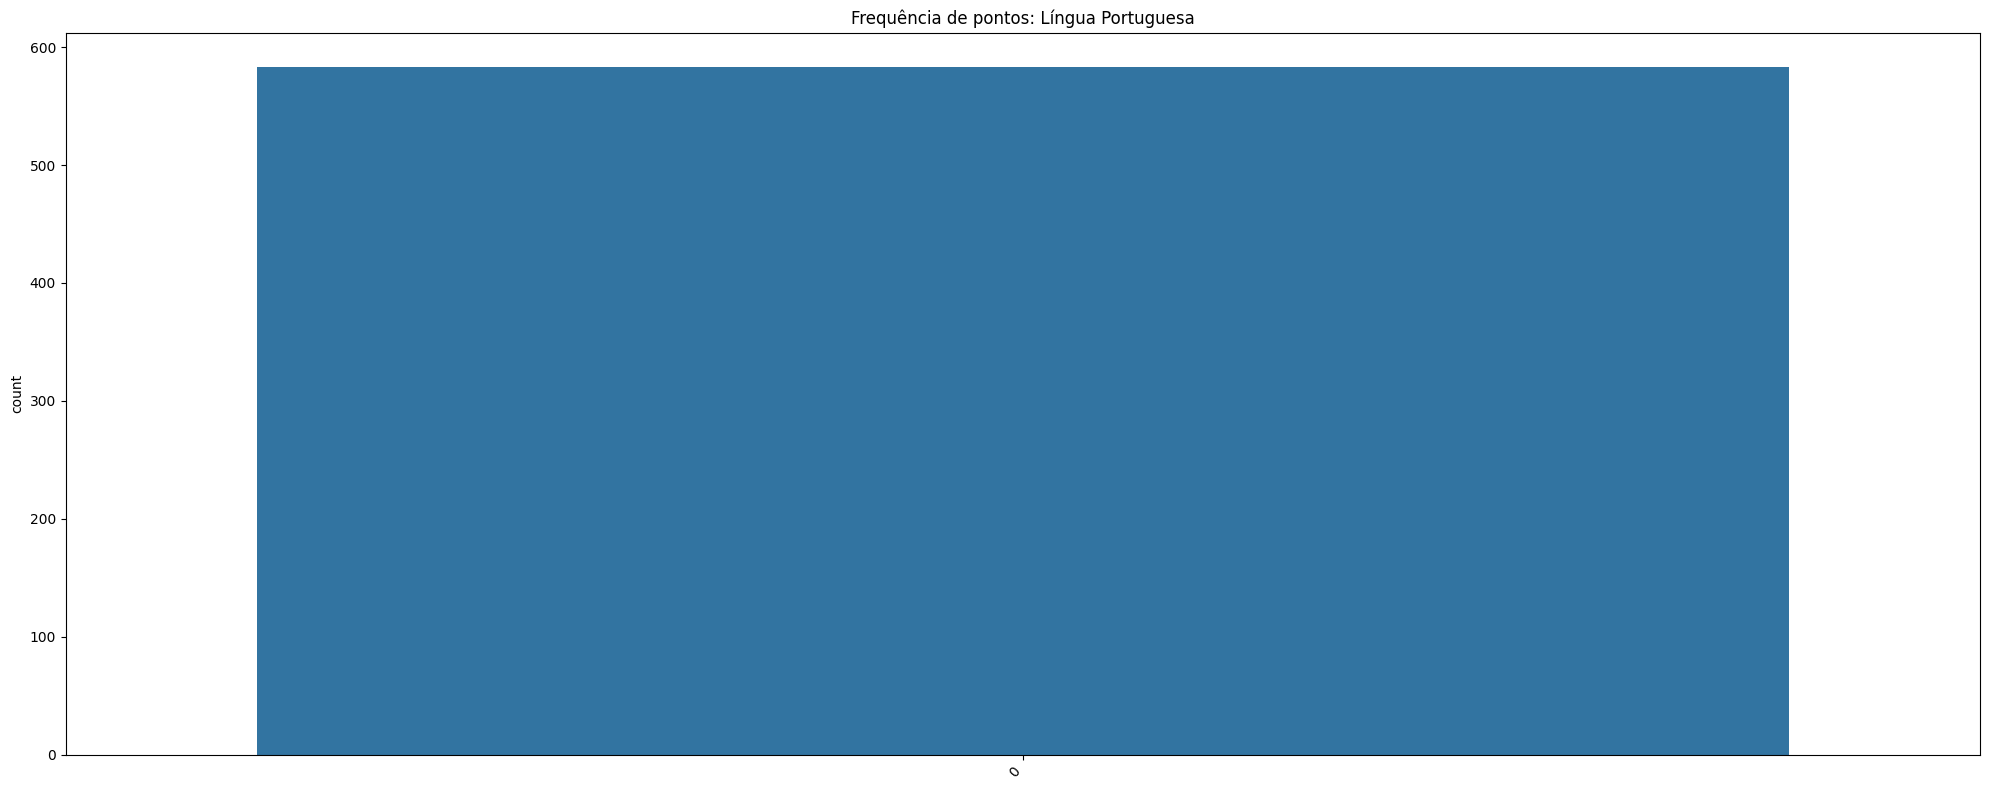

In [11]:
##Plotting pontos: Língua Portuguesa

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['l por'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Língua Portuguesa')
plt.tight_layout()

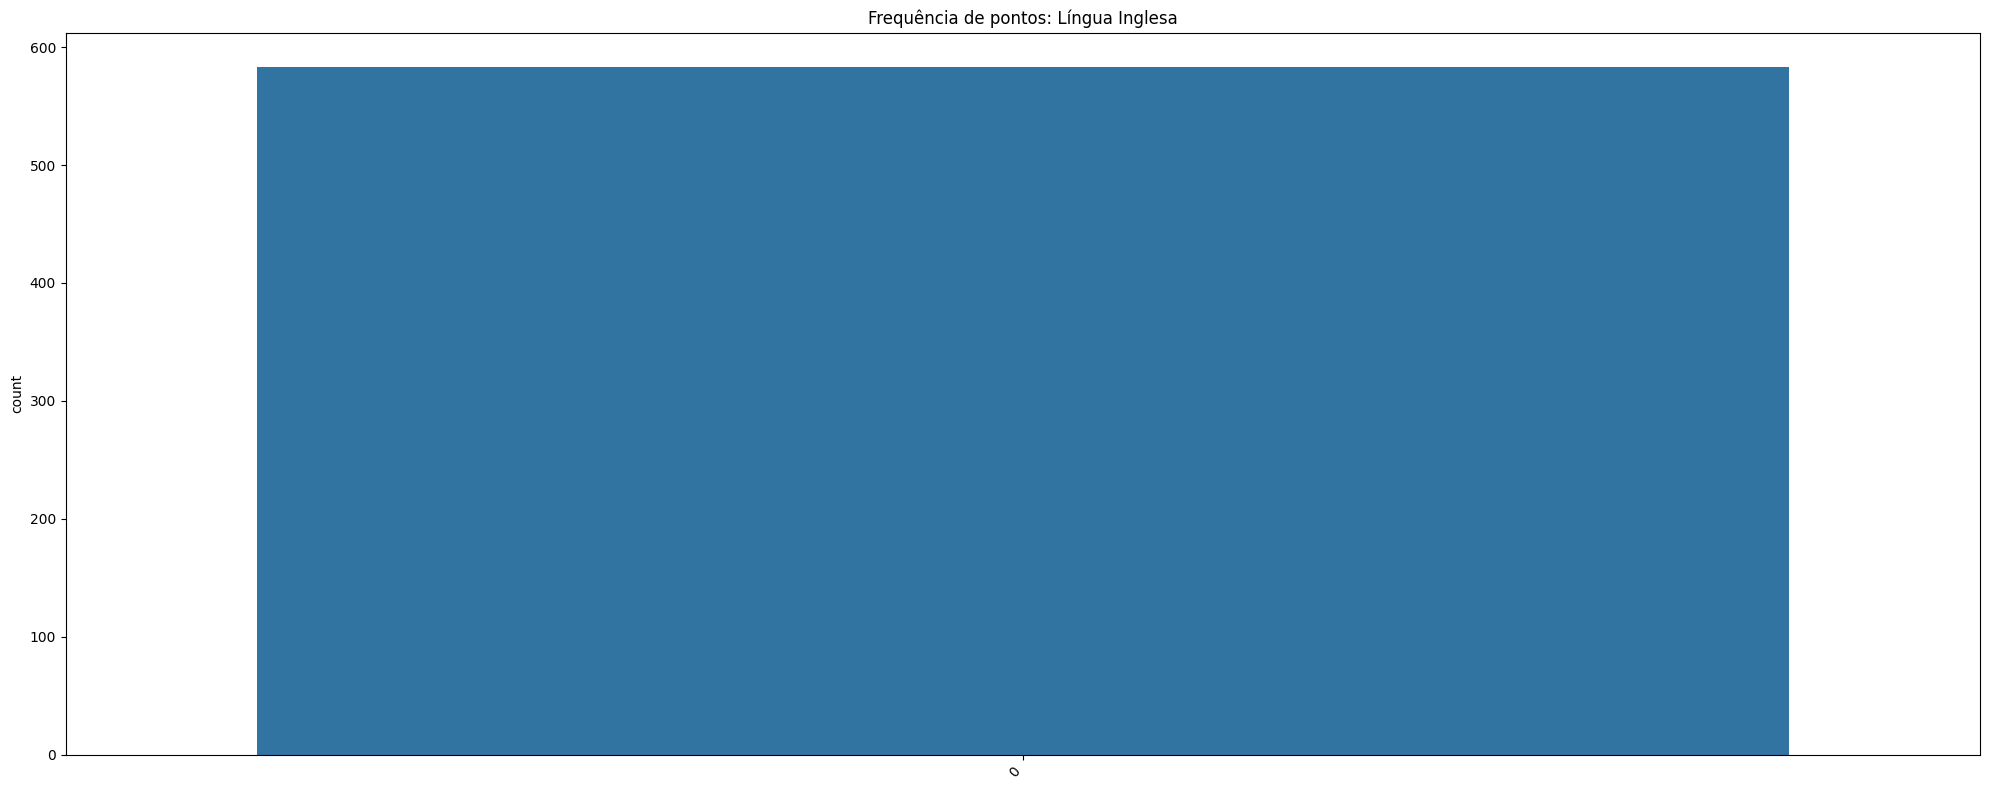

In [12]:
##Plotting pontos: Língua Inglesa

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['l ing'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Língua Inglesa')
plt.tight_layout()

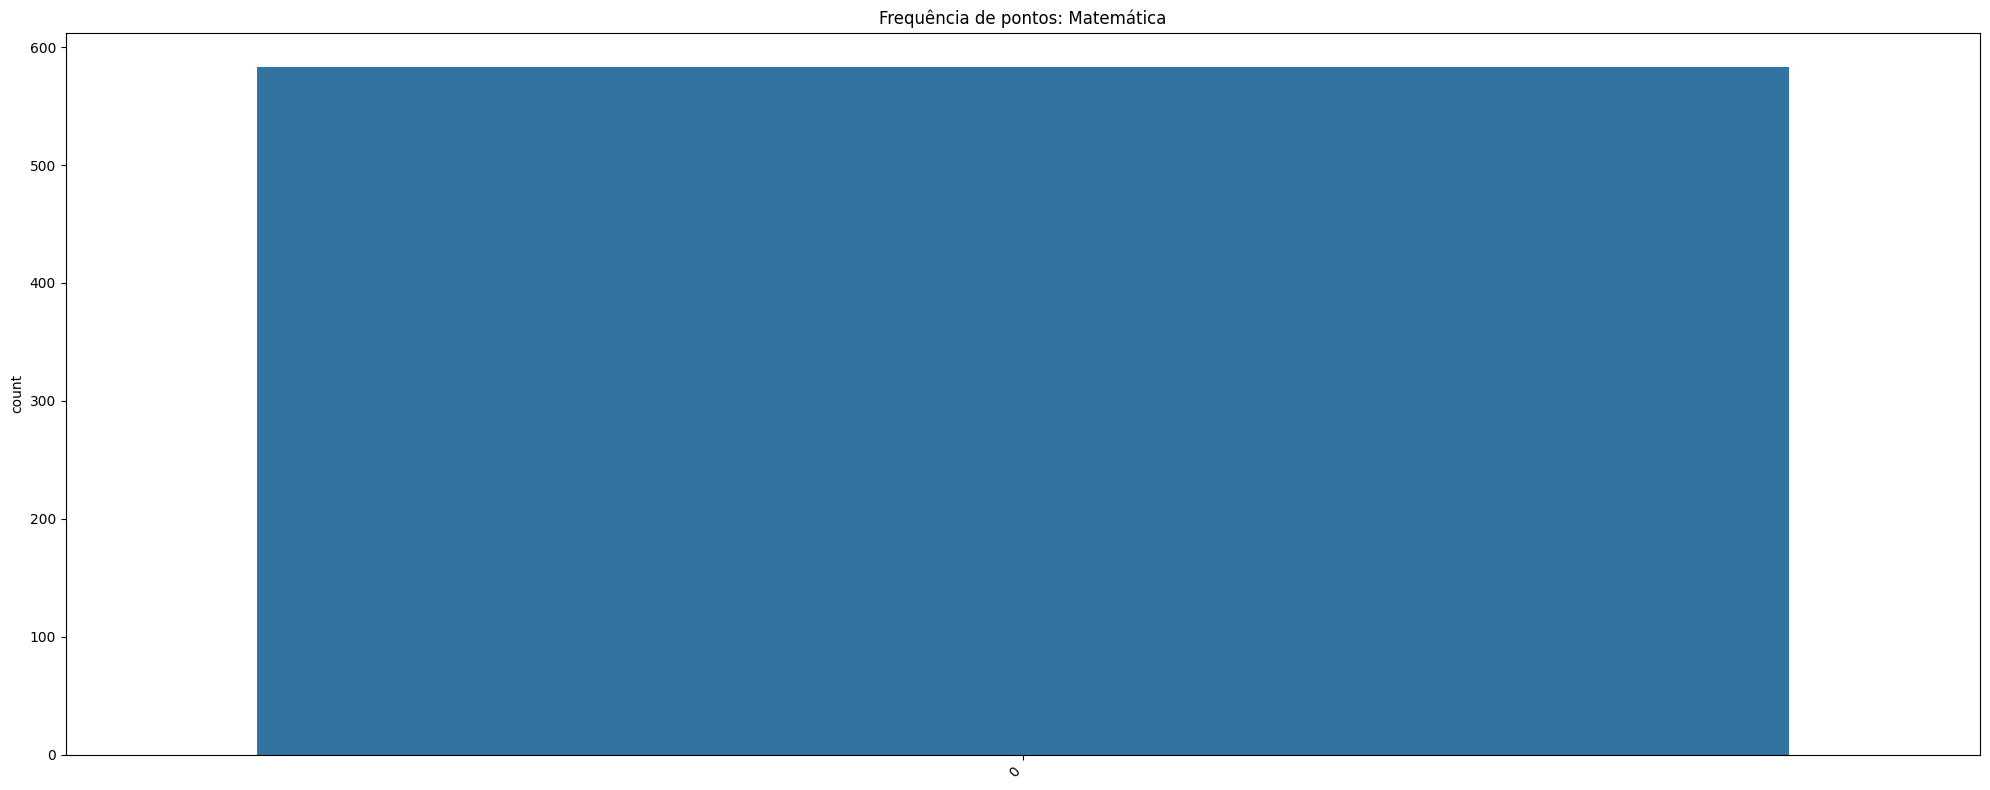

In [13]:
##Plotting pontos: Matemática

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['mat'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Matemática')
plt.tight_layout()

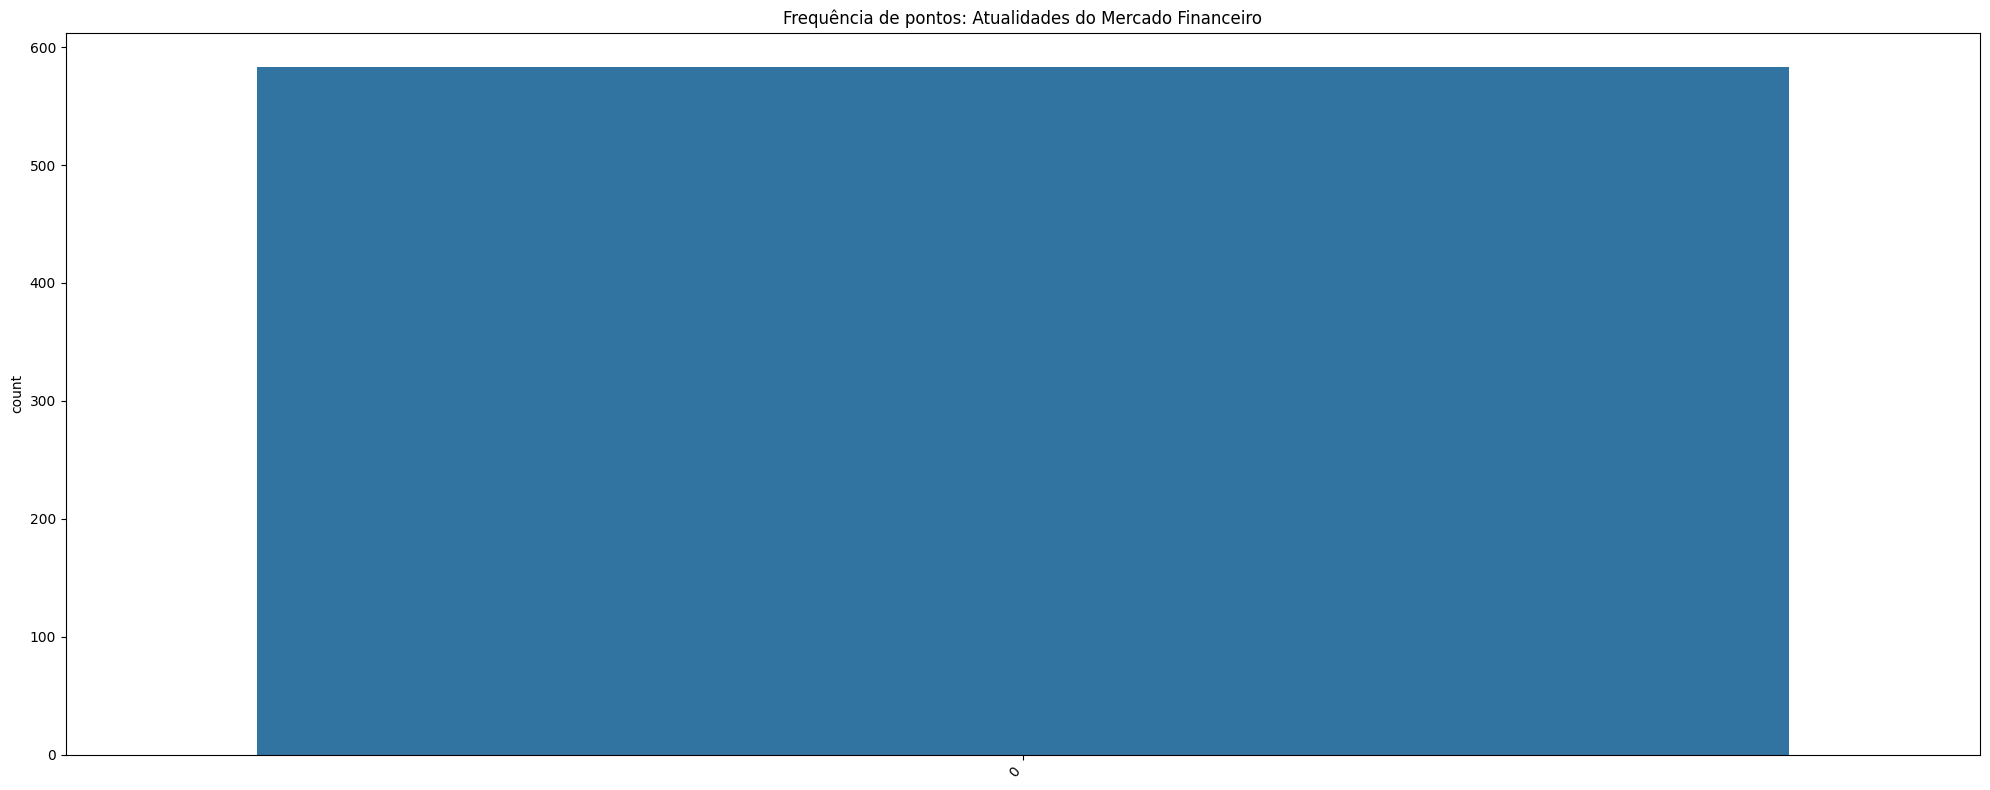

In [14]:
##Plotting pontos: Atualidades do Mercado Financeiro

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['atu'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Atualidades do Mercado Financeiro')
plt.tight_layout()

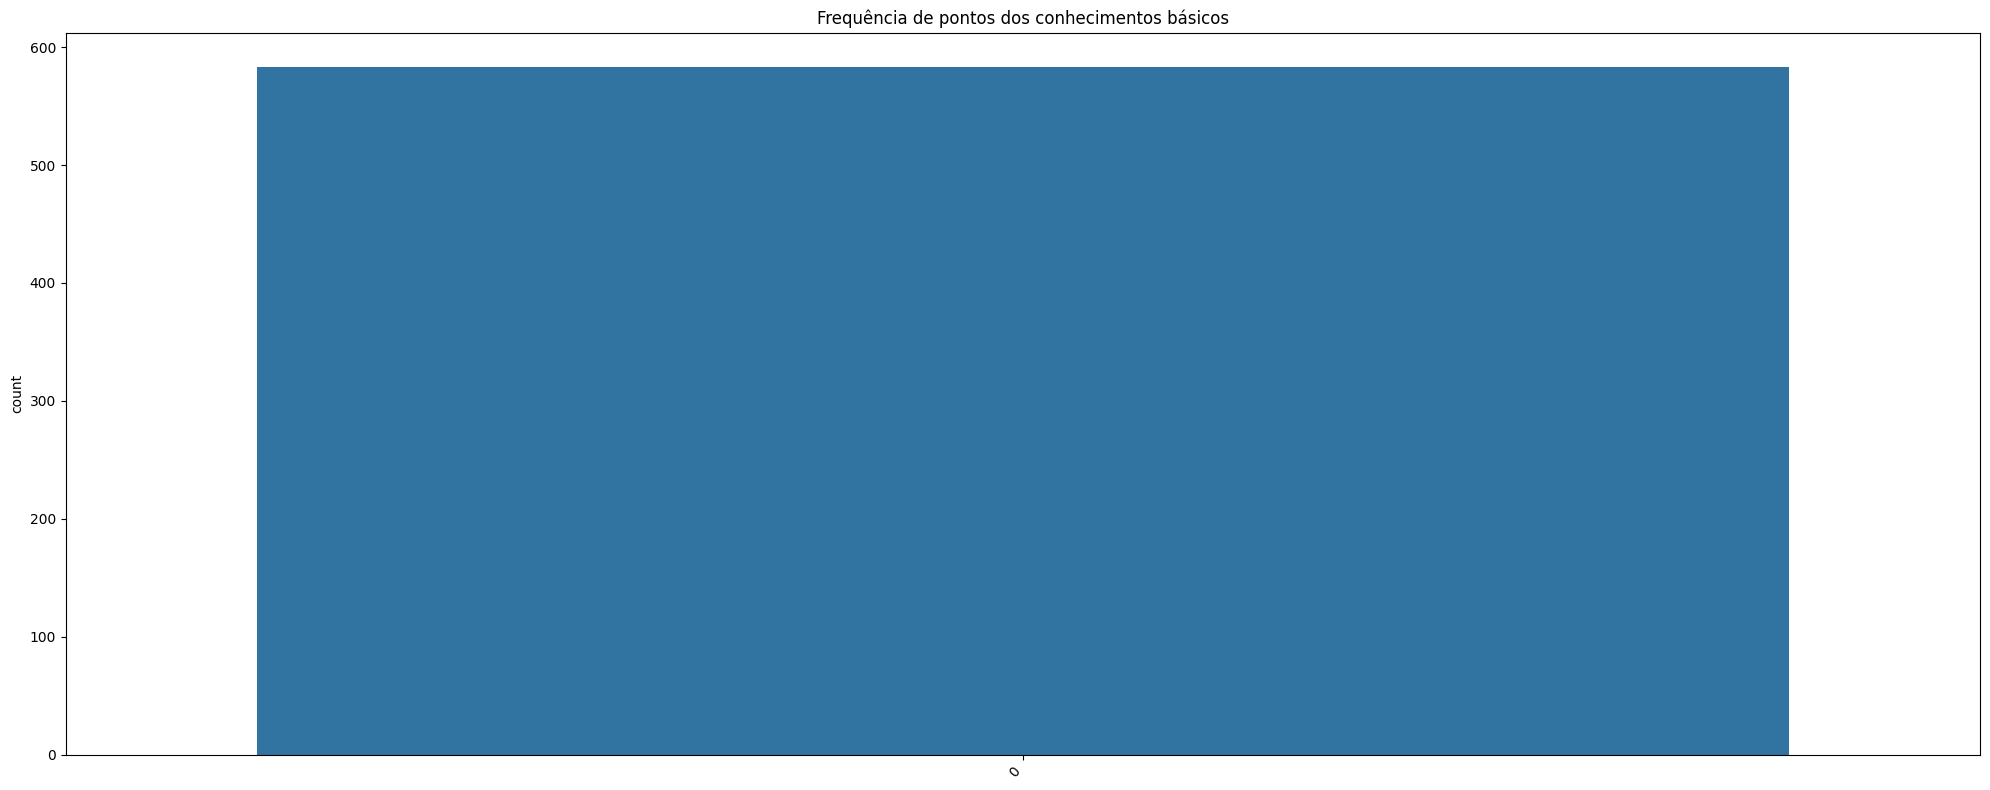

In [15]:
##Plotting pontos de conhecimentos básicos

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['conh bas'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos dos conhecimentos básicos')
plt.tight_layout()

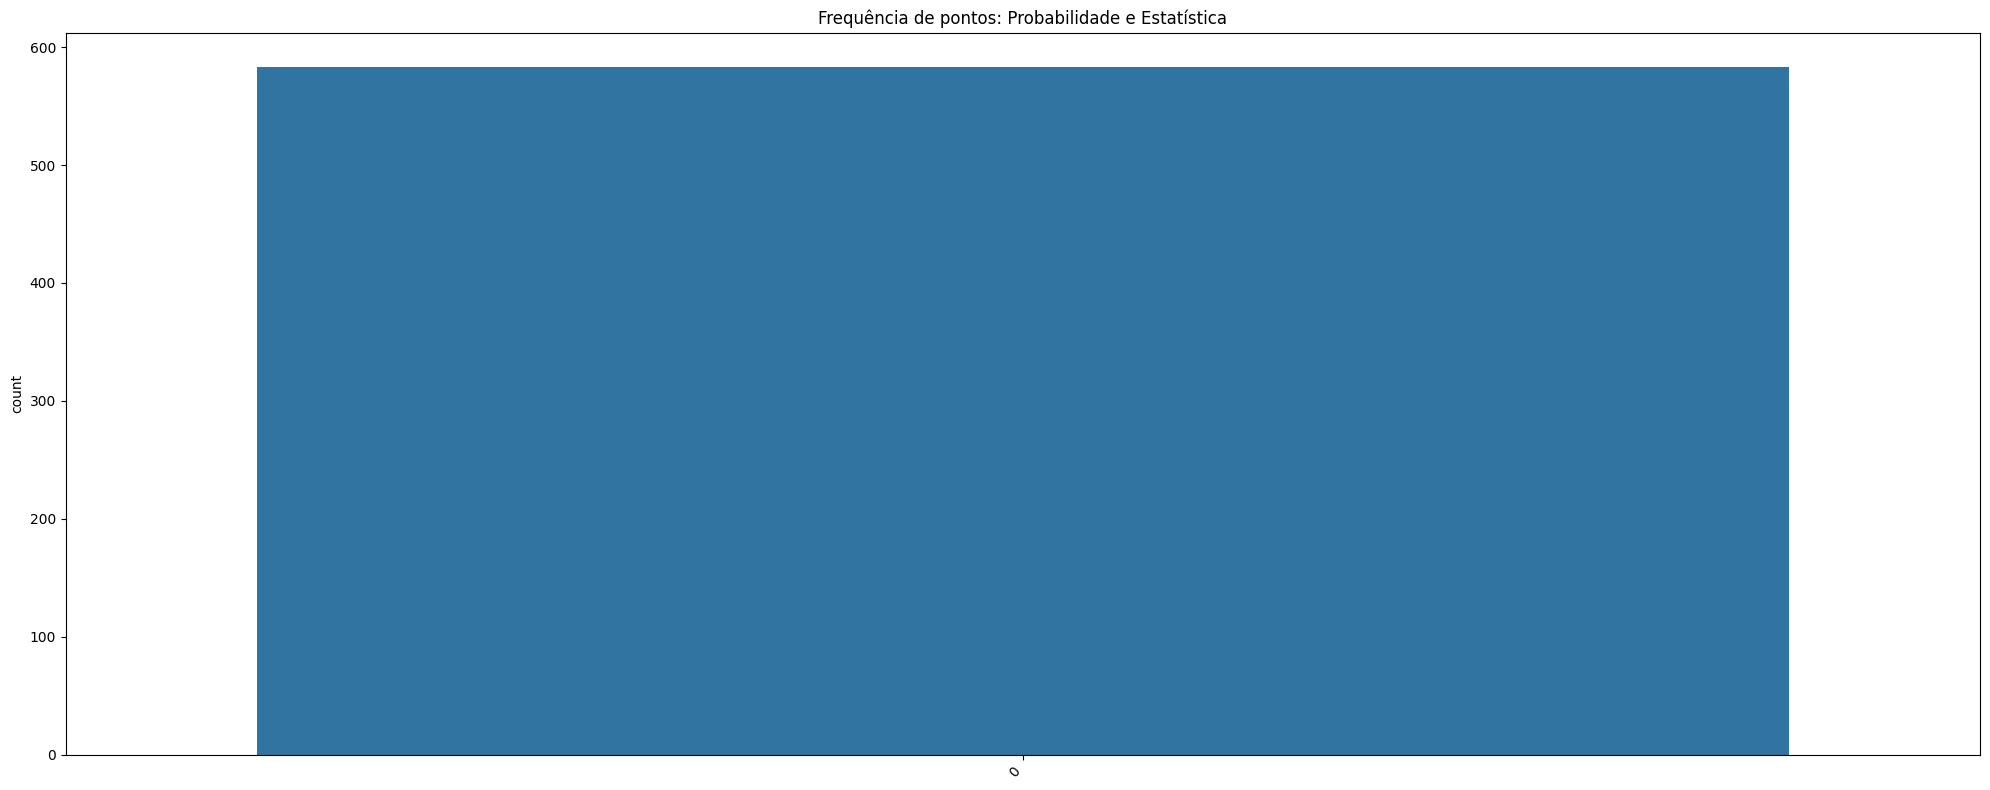

In [16]:
##Plotting pontos: Probabilidade e Estatística

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['prob'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Probabilidade e Estatística')
plt.tight_layout()

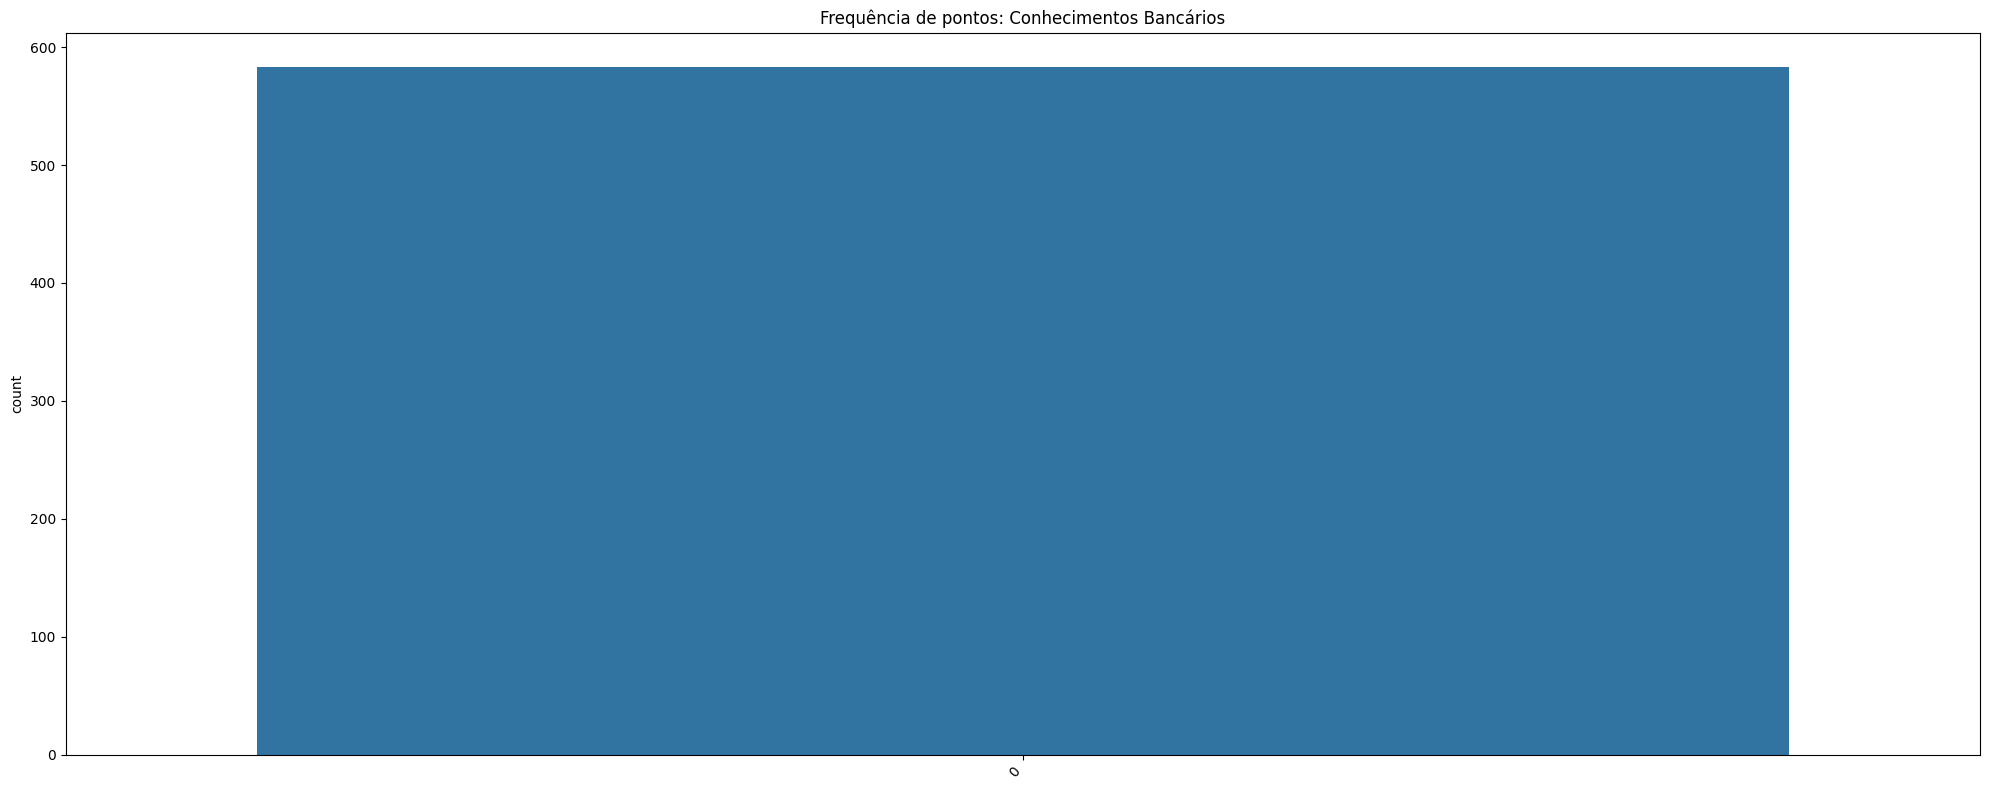

In [17]:
##Plotting pontos: Conhecimentos Bancários

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['c ban'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Conhecimentos Bancários')
plt.tight_layout()

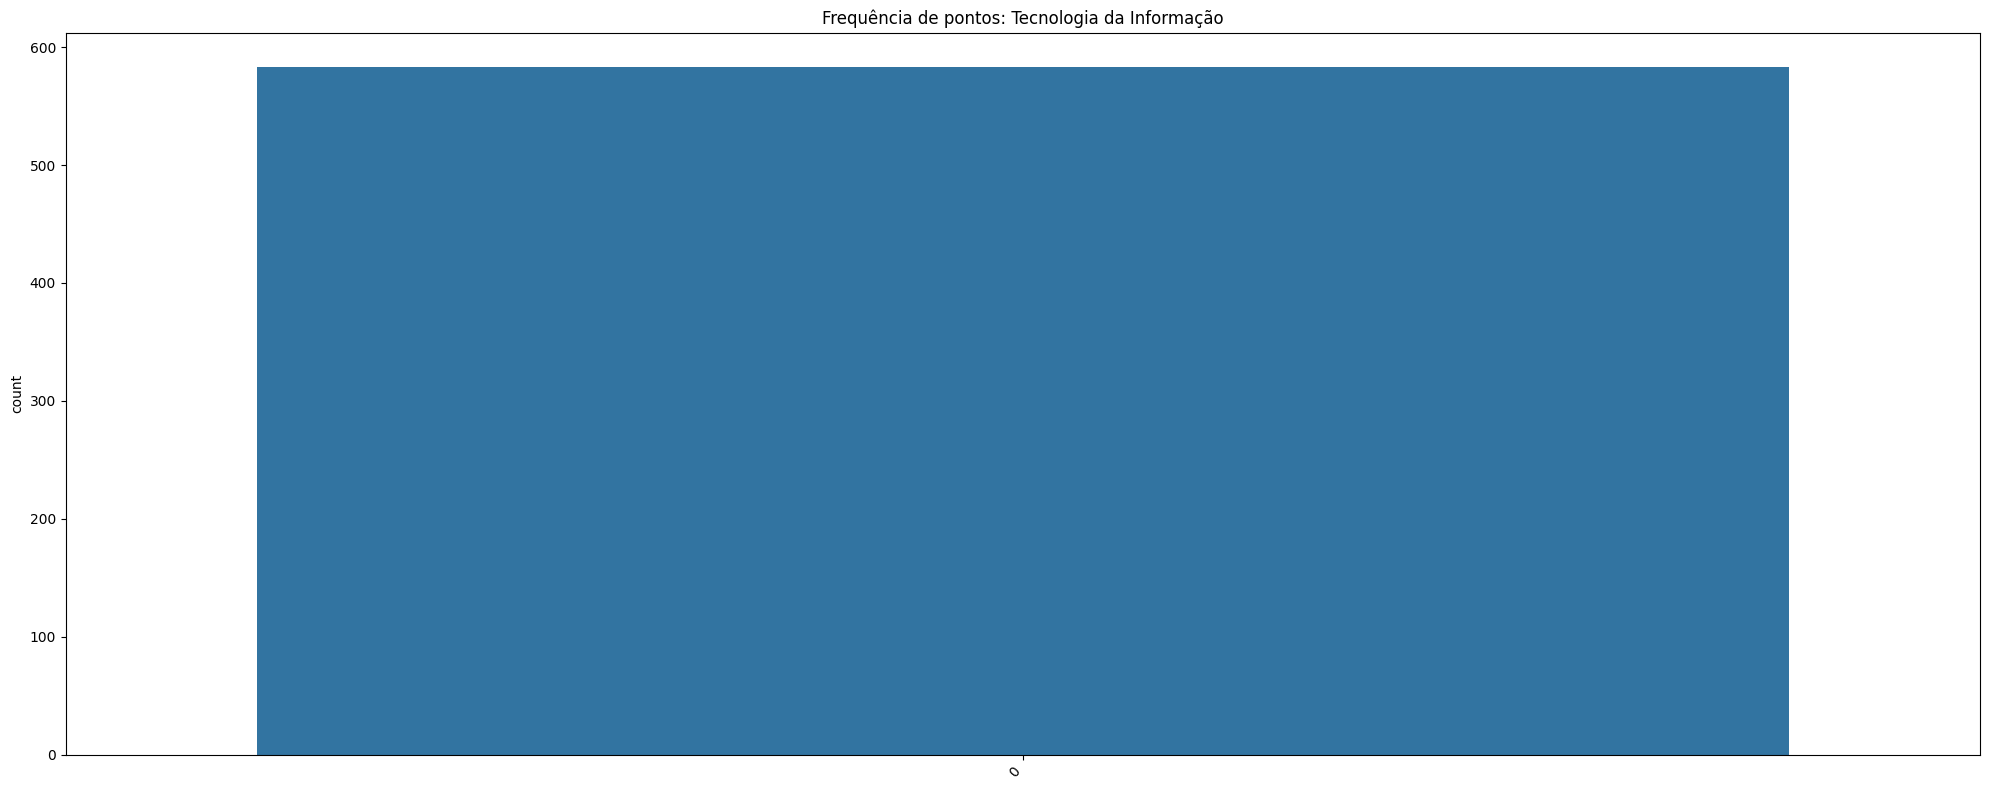

In [18]:
##Plotting pontos: Tecnologia da Informação

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['tec'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Tecnologia da Informação')
plt.tight_layout()

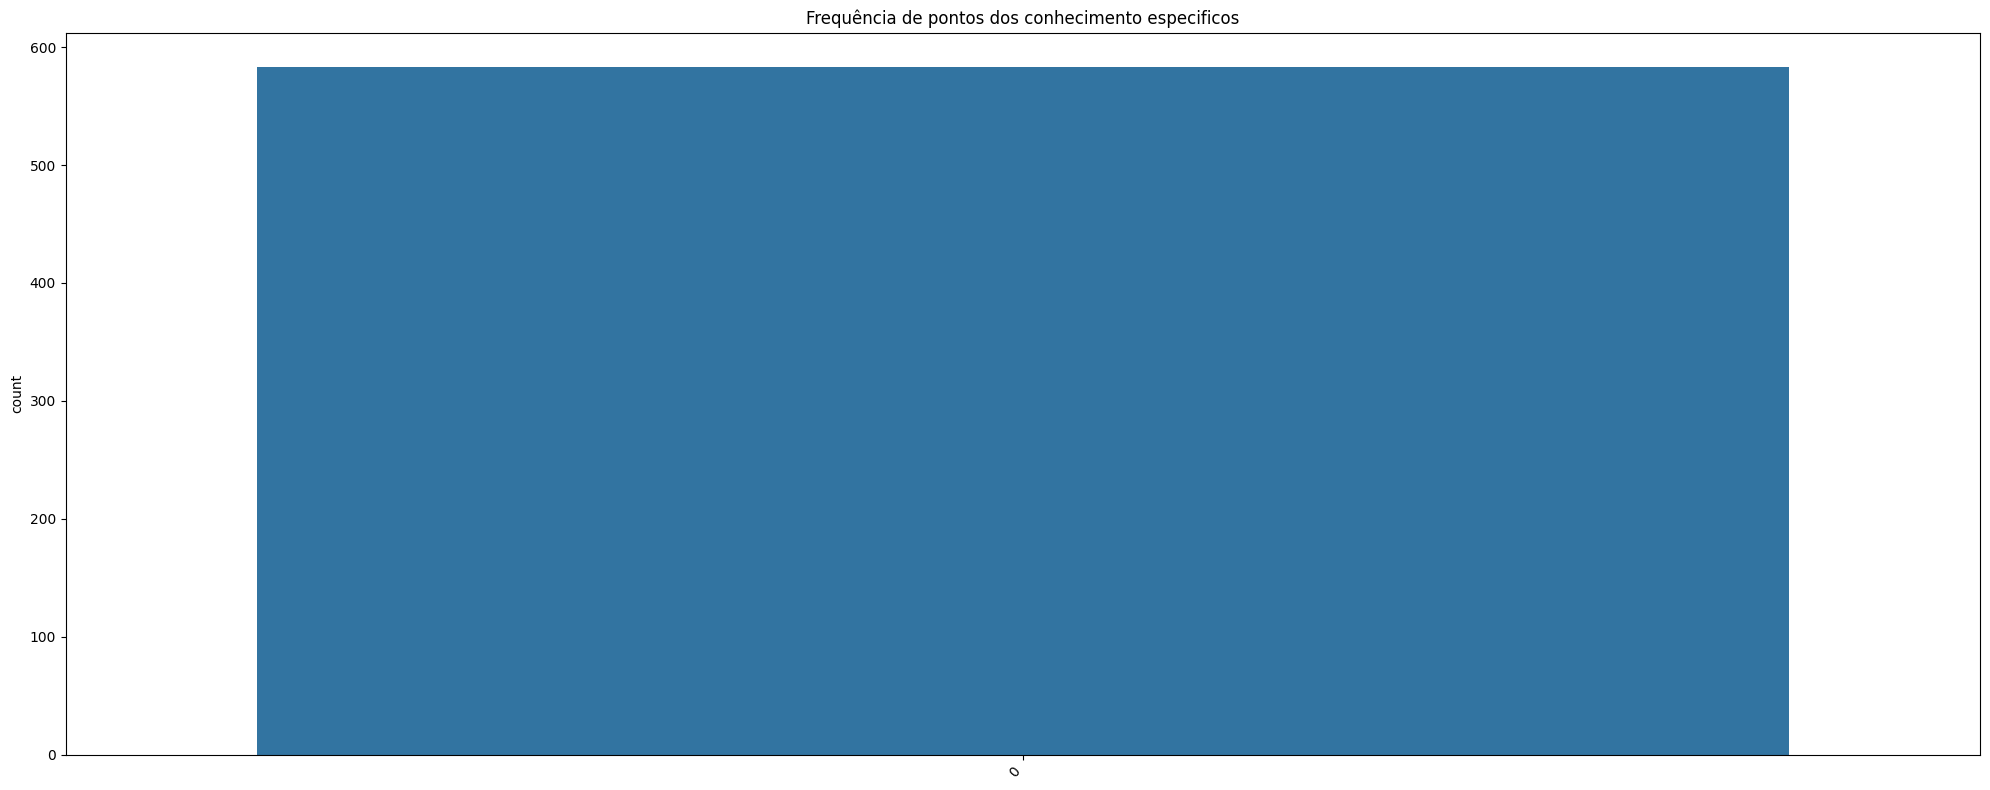

In [19]:
##Plotting pontos de conhecimento especificos

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['conh esp'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos dos conhecimento especificos')
plt.tight_layout()

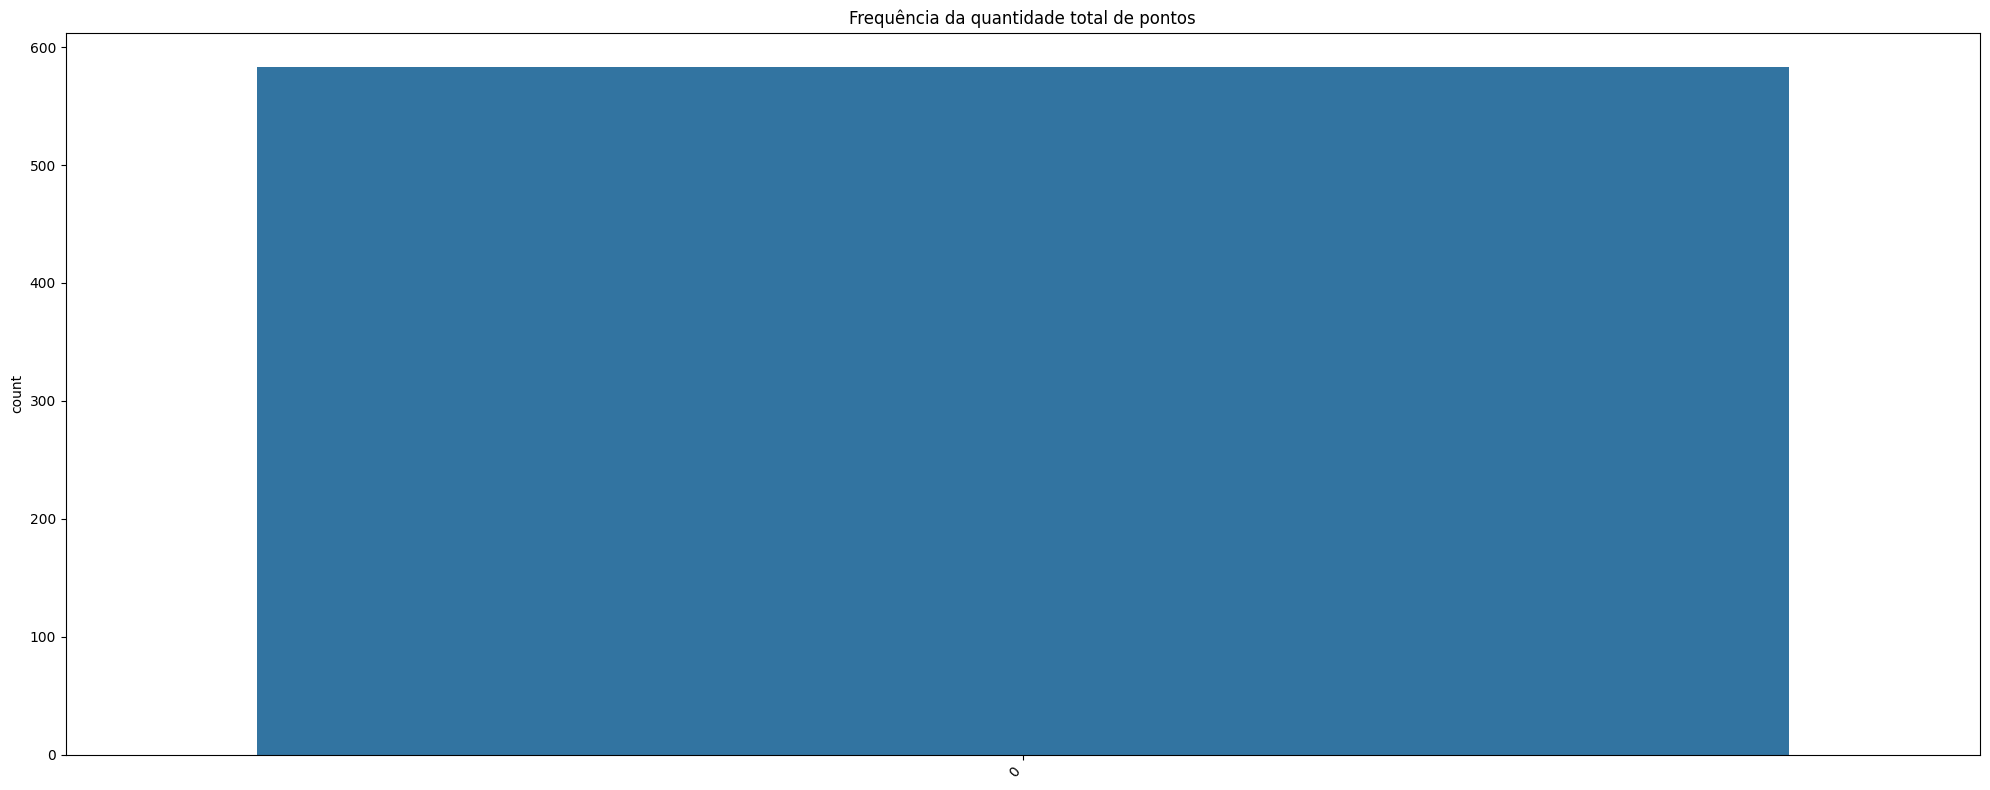

In [20]:
##Plotting quantidade total de pontos

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['pontos'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência da quantidade total de pontos')
plt.tight_layout()

In [21]:
# Duplicando dataset e dropando colunas menos relevantes para analise seguinte
dataset2 = dataset
dataset2 = dataset2.drop('class ac', 1)
dataset2 = dataset2.drop('class pcd', 1)
dataset2 = dataset2.drop('class ppp', 1)

<Axes: >

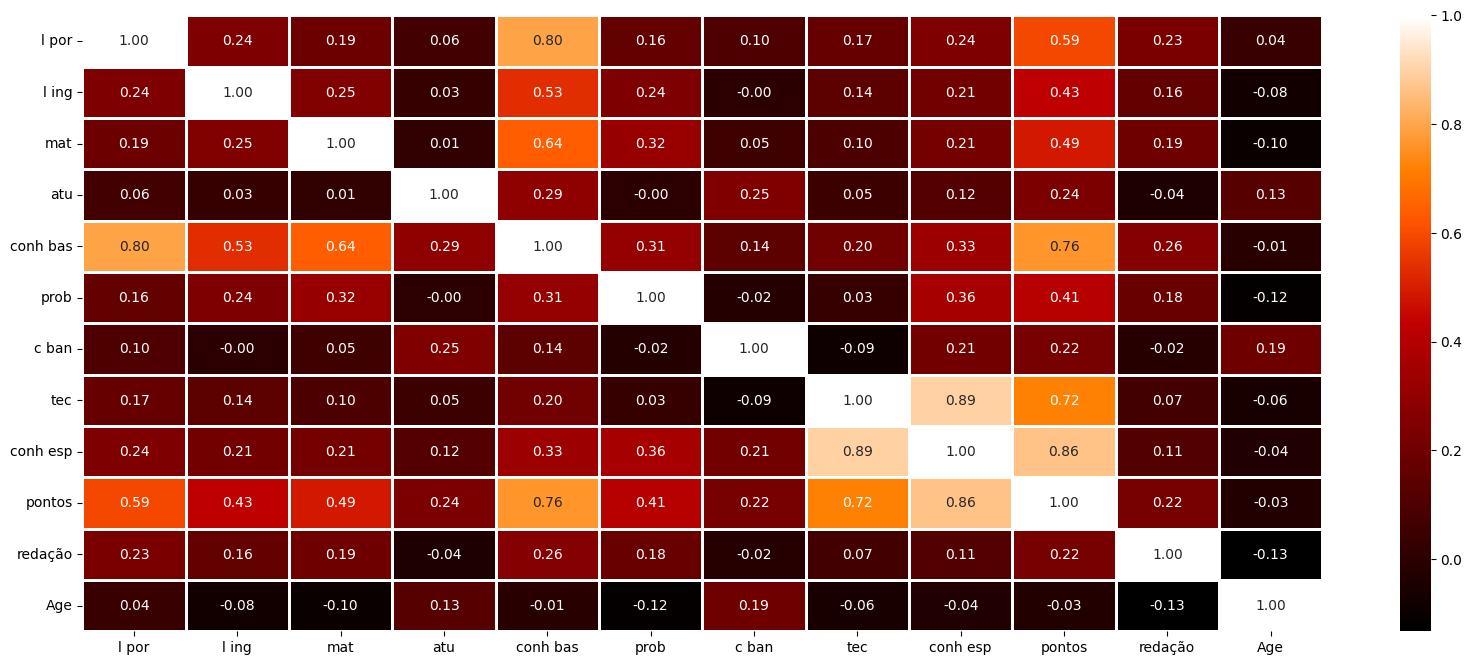

In [22]:
# Plotting de correlações

plt.figure(figsize=(20,8))
sns.heatmap(dataset2.corr(),annot=True, fmt = ".2f", linewidth = 1 , cmap="gist_heat")